In [30]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import theano
from keras.layers import Convolution2D, MaxPooling2D, Dense, Flatten, Reshape, AveragePooling2D, Dropout,Input,Activation
from keras.models import Sequential,Model
from keras.utils import np_utils

In [31]:
X = np.load('./logos_data_X.npy')
Y = np.load('./logos_data_Y.npy')

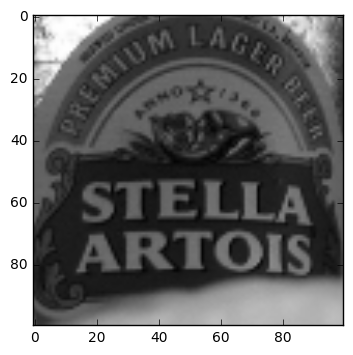

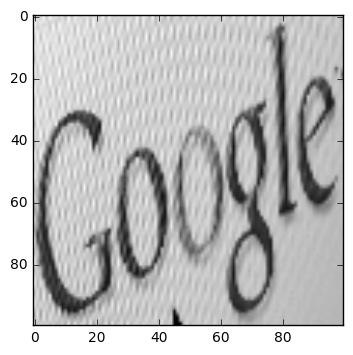

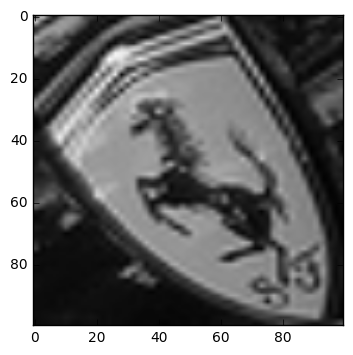

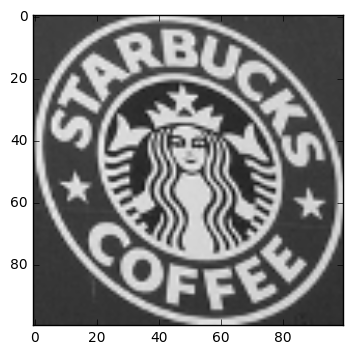

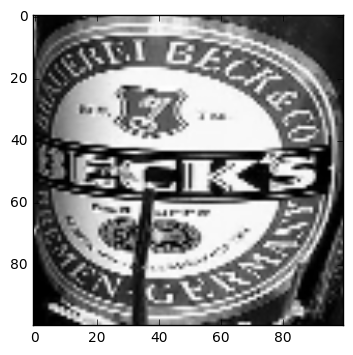

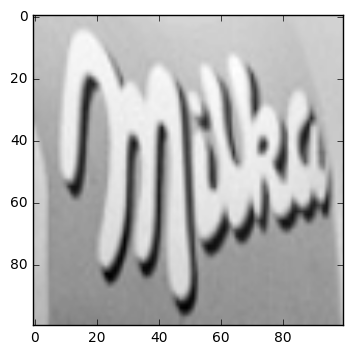

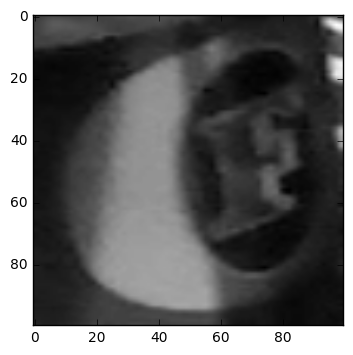

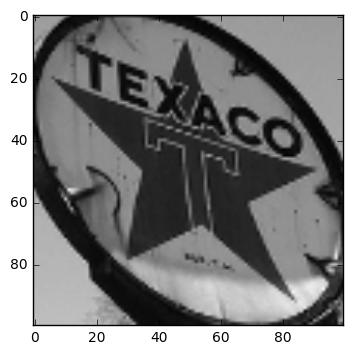

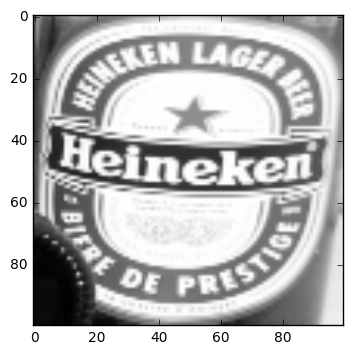

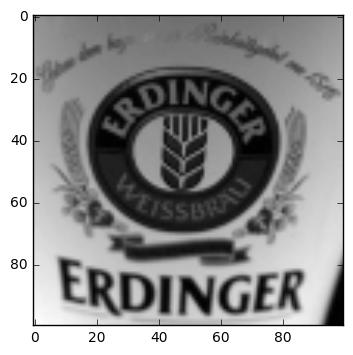

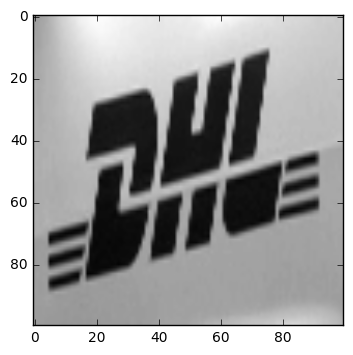

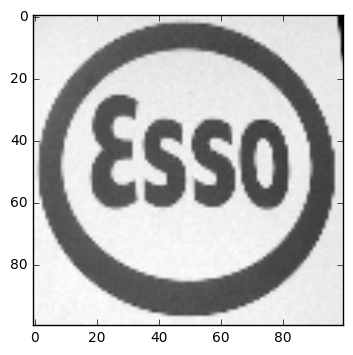

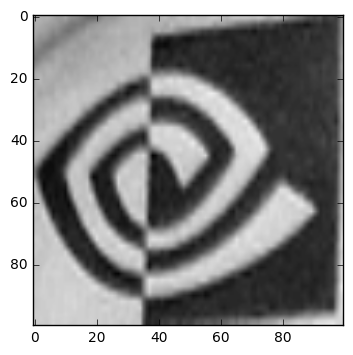

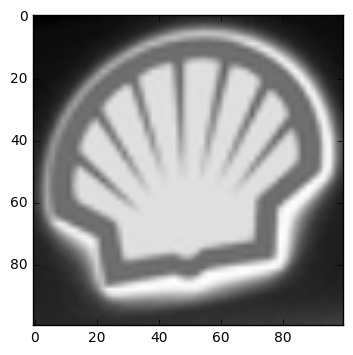

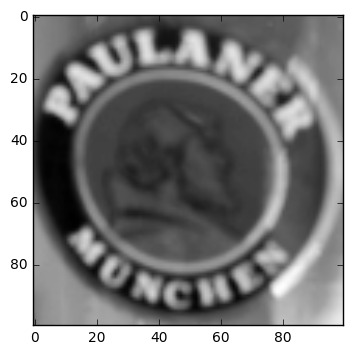

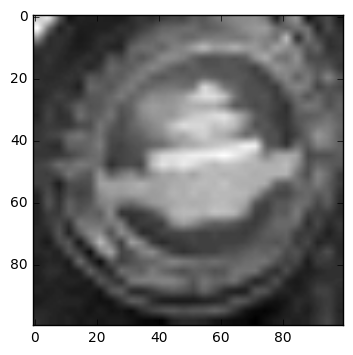

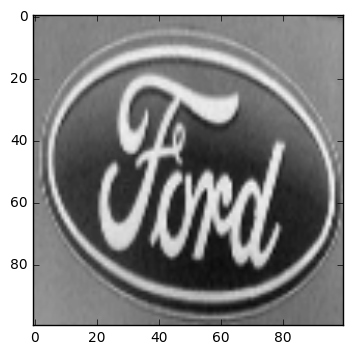

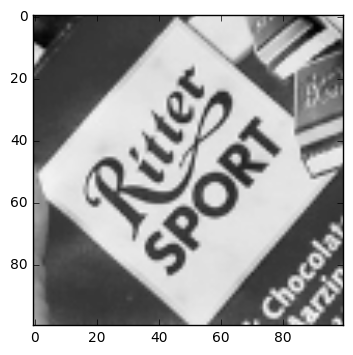

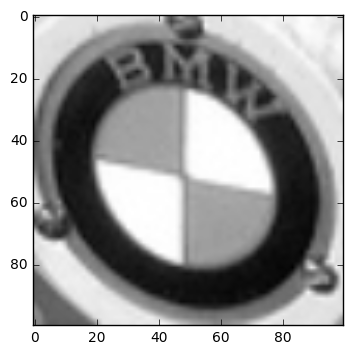

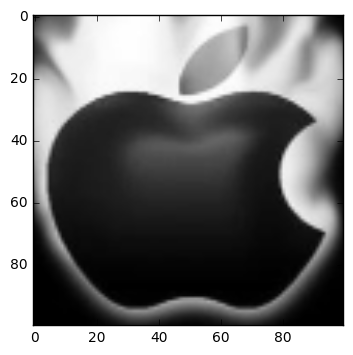

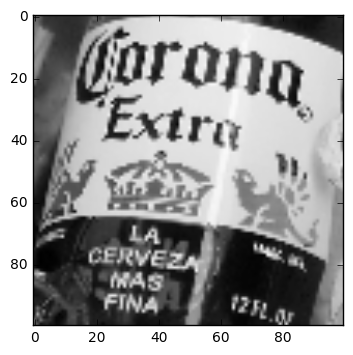

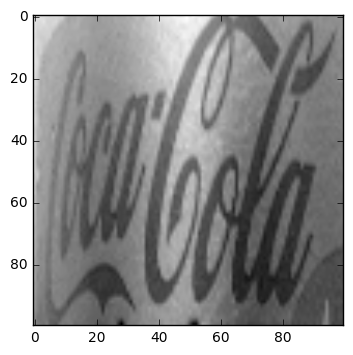

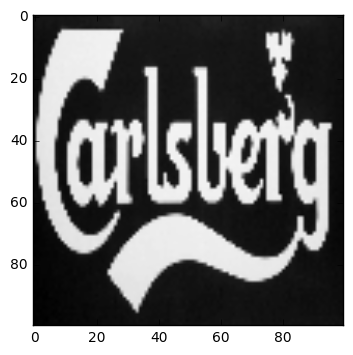

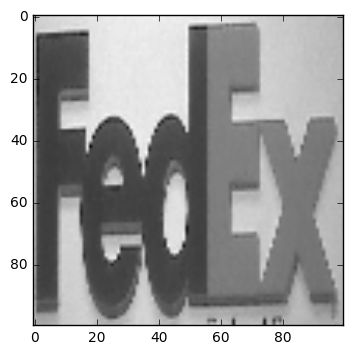

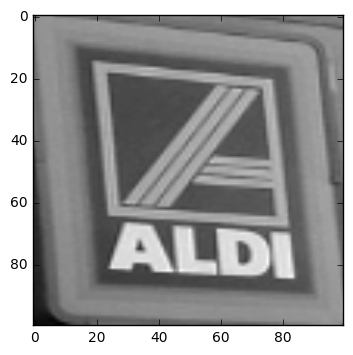

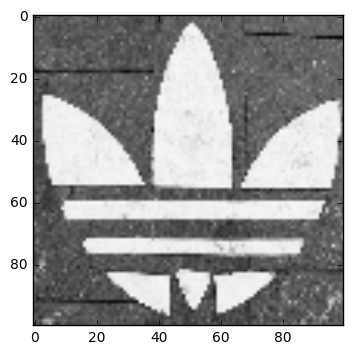

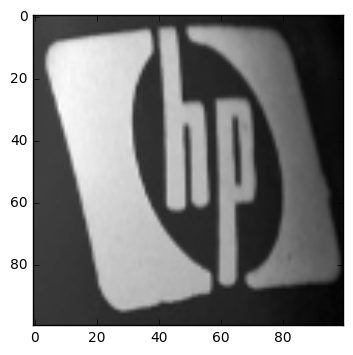

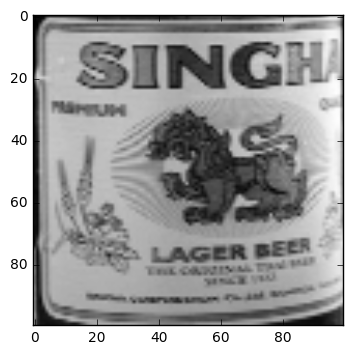

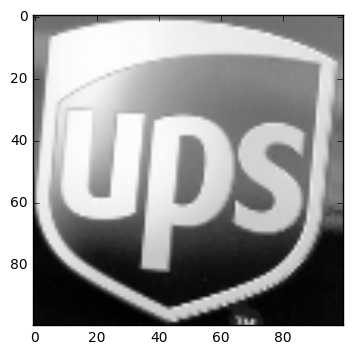

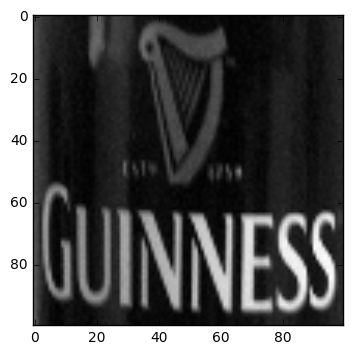

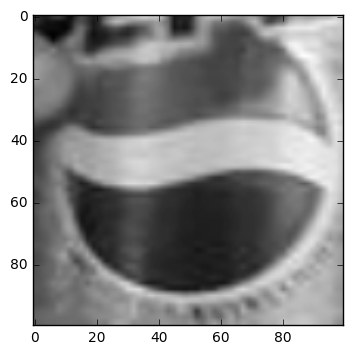

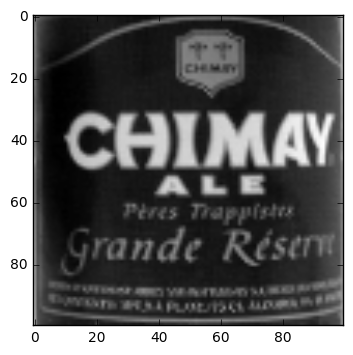

In [32]:
for ix in range(12,2240,70):
    img = X[ix].reshape(100,100)
    plt.imshow(img , cmap= 'gray')
    plt.show()

In [33]:
X[2245] = X[2249]

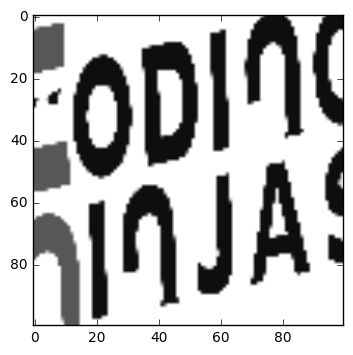

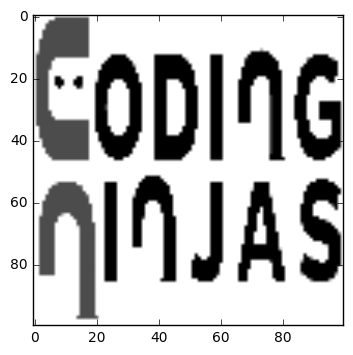

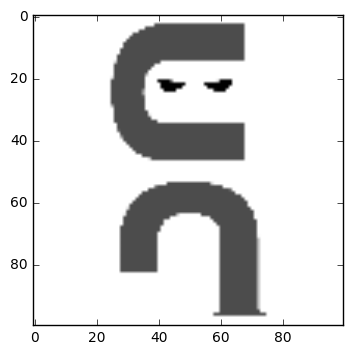

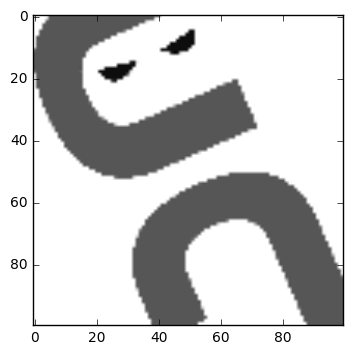

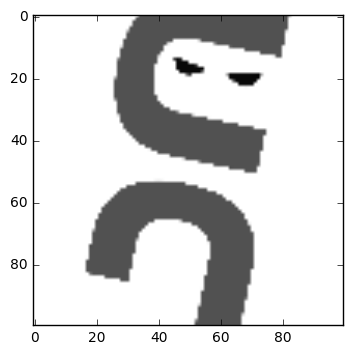

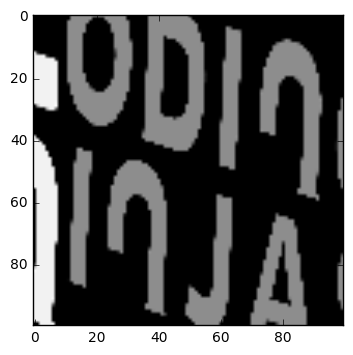

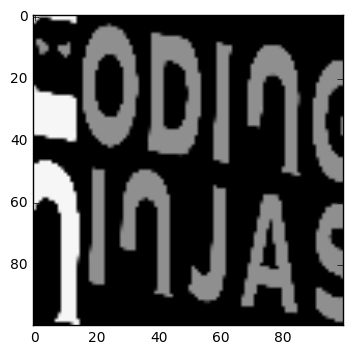

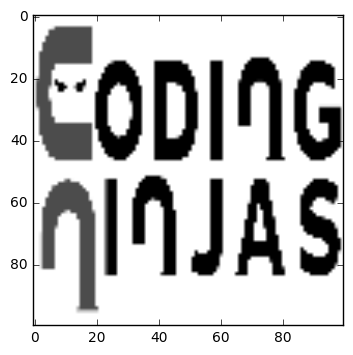

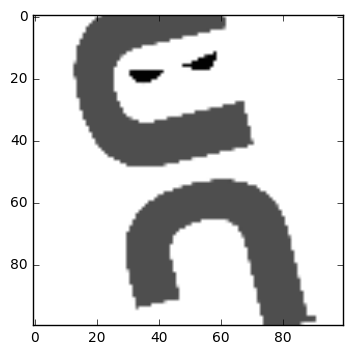

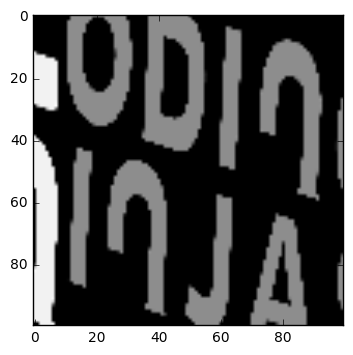

In [34]:
for ix in range(2240,2250,1):
    img = X[ix].reshape(100,100)
    plt.imshow(img, cmap = 'gray')
    plt.show()

In [35]:
x_low, x_high = 70,110 
X_train = X[:40,:]
Y_train = Y[:40,]
for _ in range(31):
    X_train = np.concatenate((X_train, X[x_low:x_high, :]), axis=0)
    Y_train = np.concatenate((Y_train, Y[x_low:x_high,]), axis=0)
    x_low = x_low + 70
    x_high = x_high + 70
    
X_train = np.concatenate((X_train, X[2240:2248,:]), axis=0)
Y_train = np.concatenate((Y_train, Y[2240:2248,]), axis=0)
X_train = np.concatenate((X_train, X[2500:3500,:]), axis=0)
Y_train = np.concatenate((Y_train, Y[2500:3500,]), axis=0)
print X_train.shape, Y_train.shape

(2288, 10000) (2288,)


In [36]:
x_low, x_high = 110,140 
X_crossval = X[40:70,:]
Y_crossval = Y[40:70,]
for _ in range(31):
    X_crossval = np.concatenate((X_crossval, X[x_low:x_high, :]), axis=0)
    Y_crossval = np.concatenate((Y_crossval, Y[x_low:x_high,]), axis=0)
    x_low = x_low + 70
    x_high = x_high + 70

X_crossval = np.concatenate((X_crossval, X[2248:2250,:]), axis=0)
Y_crossval = np.concatenate((Y_crossval, Y[2248:2250,]), axis=0)    
X_crossval = np.concatenate((X_crossval, X[2250:2500,:]), axis=0)
Y_crossval = np.concatenate((Y_crossval, Y[2250:2500,]), axis=0)
X_crossval = np.concatenate((X_crossval, X[3500:,:]), axis=0)
Y_crossval = np.concatenate((Y_crossval, Y[3500:,]), axis=0)
print X_crossval.shape, Y_crossval.shape

(1712, 10000) (1712,)


In [37]:
X_train = X_train.reshape((X_train.shape[0], 100 ,100, 1)) / 255.0
X_crossval = X_crossval.reshape((X_crossval.shape[0], 100 ,100, 1)) / 255.0
print X_train.shape

(2288, 100, 100, 1)


In [41]:
model = Sequential()

inp = Input(shape=(100, 100, 1))

c1 = Convolution2D(64, 3, 3, activation='relu')(inp)
c2 = Convolution2D(32, 3, 3, activation='relu')(c1)
m1 = MaxPooling2D(pool_size=(2, 2))(c2)
c3 = Convolution2D(32, 3, 3, activation='relu')(m1)
c4 = Convolution2D(16, 3, 3, activation='relu')(c3)
m2 = MaxPooling2D(pool_size=(2, 2))(c4)
c4 = Convolution2D(8, 3, 3, activation='relu')(m2)
f1 = Flatten()(c4)
fc1 = Dense(128)(f1) 
a1 = Activation('relu')(fc1)
d1 =  Dropout(0.35)(a1)
fc2 = Dense(34)(d1) 
a2 = Activation('softmax')(fc2)

model = Model(input=inp, output=a2)
temp = Model(input=inp, output=fc2)


model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_14 (InputLayer)            (None, 100, 100, 1)   0                                            
____________________________________________________________________________________________________
convolution2d_66 (Convolution2D) (None, 98, 98, 64)    640         input_14[0][0]                   
____________________________________________________________________________________________________
convolution2d_67 (Convolution2D) (None, 96, 96, 32)    18464       convolution2d_66[0][0]           
____________________________________________________________________________________________________
maxpooling2d_27 (MaxPooling2D)   (None, 48, 48, 32)    0           convolution2d_67[0][0]           
___________________________________________________________________________________________

In [42]:
y_tr = np_utils.to_categorical(Y_train)
y_cr = np_utils.to_categorical(Y_crossval)
print y_tr.shape, y_cr.shape
print X_train.mean()

(2288, 34) (1712, 34)
0.384245176539


In [46]:
hist = model.fit(X_train, y_tr,
                nb_epoch=2,
                shuffle=True,
                batch_size=128,
                validation_data=(X_crossval, y_cr))

Train on 2288 samples, validate on 1712 samples
Epoch 1/2
2288/2288 [==============================] - 91s - loss: 0.7040 - acc: 0.7972 - val_loss: 0.8827 - val_acc: 0.8078

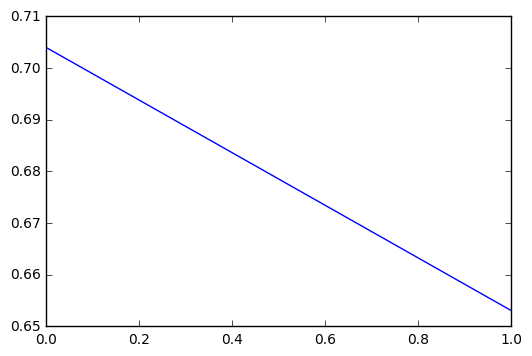

In [47]:
plt.plot(hist.history['loss'])
plt.show()

In [48]:
model.save('CNN_full.h5')
temp.save('CNN_temp.h5')